In [1]:
pip install pandas scikit-learn matplotlib xgboost openpyxl


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset directly from sklearn
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Show the first few rows of the dataset
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [3]:
# Define the features (X) and the target (y)
X = df.drop('target', axis=1)  # All the columns except 'target' are features
y = df['target']  # 'target' is the column we're trying to predict (malignant/benign)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Check accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.37%


[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



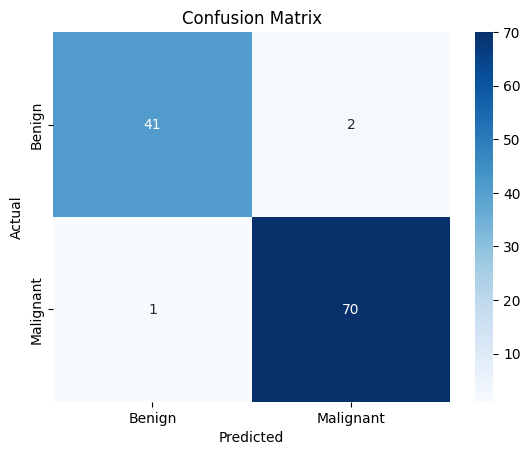

In [5]:
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV

# Example: Tuning hyperparameters for SVM
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

# Get the best model after hyperparameter tuning
best_model = grid.best_estimator_

# Make predictions
y_pred_best = best_model.predict(X_test_scaled)

# Check accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

In [7]:
import pickle

# Save the trained model as a pickle file
with open('breast_cancer_detection_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 95.61%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 94.74%
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [11]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [12]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 95.61%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:34:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [14]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dictionary to store all model metrics
model_metrics = {}

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    
    return accuracy, precision, recall, f1
 # Store metrics in the dictionary
    model_metrics[model_name] = [accuracy, precision, recall, f1]

# Evaluate all models
print("Logistic Regression:")
evaluate_model(model, X_test_scaled, y_test)

print("\nSVM:")
evaluate_model(svm_model, X_test_scaled, y_test)

print("\nRandom Forest:")
evaluate_model(rf_model, X_test_scaled, y_test)

print("\nKNN:")
evaluate_model(knn_model, X_test_scaled, y_test)

print("\nNaive Bayes:")
evaluate_model(nb_model, X_test_scaled, y_test)

print("\nXGBoost:")
evaluate_model(xgb_model, X_test_scaled, y_test)
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(model_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Transpose the DataFrame for a more intuitive view (models as rows)
df = df.transpose()

# Display the comparison table
print(df)


Logistic Regression:
Accuracy: 97.37%
Precision: 97.22%
Recall: 98.59%
F1-Score: 97.90%

SVM:
Accuracy: 95.61%
Precision: 97.14%
Recall: 95.77%
F1-Score: 96.45%

Random Forest:
Accuracy: 96.49%
Precision: 95.89%
Recall: 98.59%
F1-Score: 97.22%

KNN:
Accuracy: 94.74%
Precision: 95.77%
Recall: 95.77%
F1-Score: 95.77%

Naive Bayes:
Accuracy: 96.49%
Precision: 95.89%
Recall: 98.59%
F1-Score: 97.22%

XGBoost:
Accuracy: 95.61%
Precision: 95.83%
Recall: 97.18%
F1-Score: 96.50%
Empty DataFrame
Columns: [Accuracy, Precision, Recall, F1-Score]
Index: []


In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dictionary to store all model metrics
model_metrics = {}

# Function to calculate metrics for a given model
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store metrics in the dictionary
    model_metrics[model_name] = [accuracy, precision, recall, f1]

# Evaluate each model
evaluate_model(model, 'Logistic Regression', X_test_scaled, y_test)
evaluate_model(svm_model, 'SVM', X_test_scaled, y_test)
evaluate_model(rf_model, 'Random Forest', X_test_scaled, y_test)
evaluate_model(knn_model, 'KNN', X_test_scaled, y_test)
evaluate_model(nb_model, 'Naive Bayes', X_test_scaled, y_test)
evaluate_model(xgb_model, 'XGBoost', X_test_scaled, y_test)

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(model_metrics, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Transpose the DataFrame for a more intuitive view (models as rows)
df = df.transpose()

# Display the comparison table
print(df)


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.973684   0.972222  0.985915  0.979021
SVM                  0.956140   0.971429  0.957746  0.964539
Random Forest        0.964912   0.958904  0.985915  0.972222
KNN                  0.947368   0.957746  0.957746  0.957746
Naive Bayes          0.964912   0.958904  0.985915  0.972222
XGBoost              0.956140   0.958333  0.971831  0.965035


In [16]:
# Save to CSV
df.to_csv('model_comparison.csv')

# Save to Excel
df.to_excel('model_comparison.xlsx')


In [17]:
best_model = model


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'penalty': ['l1', 'l2'],              # Type of regularization
    'solver': ['liblinear'],              # Solver that supports 'l1' and 'l2'
    'max_iter': [100, 200, 500]           # Number of iterations for convergence
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model found by GridSearchCV
best_log_reg = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Logistic Regression Accuracy: {accuracy * 100:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Optimized Logistic Regression Accuracy: 99.12%


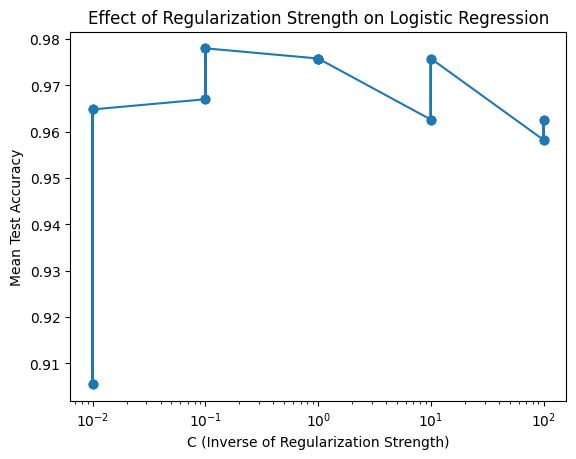

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the GridSearchCV results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Plot the mean test score against different values of C
plt.plot(results_df['param_C'], results_df['mean_test_score'], marker='o')
plt.xscale('log')  # Use a logarithmic scale for C
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Accuracy')
plt.title('Effect of Regularization Strength on Logistic Regression')
plt.show()


In [20]:
import pickle
from sklearn.linear_model import LogisticRegression

# Assuming you've already trained your logistic regression model
best_model = LogisticRegression()  # Replace this with your actual trained model
best_model.fit(X_train_scaled, y_train)  # Ensure X_train_scaled and y_train are your training data

# Save the model to a file
with open('best_cancer_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)


In [22]:
import numpy as np

# Create a new sample (use the mean or a similar set of values from the dataset)
new_sample = np.array([[14.69, 23.78, 94.48, 103.9, 20.98, 0.09081, 
                        0.133, 0.09373, 0.1127, 0.07252, 0.17860, 
                        0.3424, 1.031, 9.456, 0.004394, 0.03167, 
                        0.03287, 0.01857, 0.01961, 0.003471, 16.95, 
                        28.77, 112.4, 161.9, 26.54, 0.09699, 0.222, 
                        0.2065, 0.2351, 0.08599]])

print("New Sample Data for Prediction:", new_sample)


New Sample Data for Prediction: [[1.469e+01 2.378e+01 9.448e+01 1.039e+02 2.098e+01 9.081e-02 1.330e-01
  9.373e-02 1.127e-01 7.252e-02 1.786e-01 3.424e-01 1.031e+00 9.456e+00
  4.394e-03 3.167e-02 3.287e-02 1.857e-02 1.961e-02 3.471e-03 1.695e+01
  2.877e+01 1.124e+02 1.619e+02 2.654e+01 9.699e-02 2.220e-01 2.065e-01
  2.351e-01 8.599e-02]]


In [23]:
from sklearn.preprocessing import StandardScaler

# Load the saved scaler (if you saved it during training)
# scaler = pickle.load(open('scaler.pkl', 'rb'))

# Assuming the scaler was created during training
scaler = StandardScaler()
scaler.fit(data.data)  # Fit on the original data

# Scale the new sample
new_sample_scaled = scaler.transform(new_sample)

print("Scaled New Sample:", new_sample_scaled)


Scaled New Sample: [[ 1.59817134e-01  1.04493493e+00  1.03427217e-01 -1.56706955e+00
   1.48619345e+03 -2.56432168e-01  5.54938313e-01  1.15585038e+00
  -2.49950386e+00  1.37824997e+00 -8.17746136e-01 -1.58655924e+00
  -9.08410490e-01 -6.79436535e-01 -8.82362078e-01  3.46060268e-01
   3.23706596e-02  1.09878604e+00 -1.12881340e-01 -1.22517072e-01
   1.40983897e-01  5.03639500e-01  1.53063090e-01 -1.26338221e+00
   1.15760206e+03 -1.00048902e+00 -2.40780429e-01  1.39922954e+00
  -8.89384132e-01  1.13280060e-01]]


In [24]:
# Load the saved model (assuming you've already saved it)
with open('best_cancer_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict the result
prediction = model.predict(new_sample_scaled)

# Output the result
print("Prediction:", "Malignant (Cancerous)" if prediction[0] == 1 else "Benign (Non-Cancerous)")


Prediction: Benign (Non-Cancerous)
